In [1]:
%matplotlib inline
import GPy
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.lines as mlines

GPy.plotting.change_plotting_library('matplotlib')

ImportError: No module named GPy

In [2]:
kern1 = GPy.kern.RBF(input_dim=1, variance=10, lengthscale=100)#**GPy.kern.Coregionalize(1,output_dim=3, rank=1)
kern2 = GPy.kern.RBF(input_dim=1, variance=10, lengthscale=100)#**GPy.kern.Coregionalize(1,output_dim=3, rank=1)

display(kern1)


rbf.,value,constraints,priors
variance,10.0,+ve,
lengthscale,100.0,+ve,


In [4]:
vel = np.loadtxt('hornsrev_data_VxVy.txt')
inp = np.loadtxt('hornsrev_data_alphaxy.txt')
Y1 = np.array(vel[:80,0])
Y1 = Y1[:,None]
#print Y1
Y2 = np.array(vel[:80,1])
Y2 = Y2[:,None]
X = np.array(inp[:80,1])
X = X[:,None]

#X = np.transpose(X)
#print X1

X = X-X.mean()
print (X)


[[-2727.2375]
 [-2668.2375]
 [-2609.2375]
 [-2550.2375]
 [-2492.2375]
 [-2433.2375]
 [-2374.2375]
 [-2315.2375]
 [-2167.2375]
 [-2108.2375]
 [-2049.2375]
 [-1990.2375]
 [-1931.2375]
 [-1872.2375]
 [-1813.2375]
 [-1754.2375]
 [-1607.2375]
 [-1548.2375]
 [-1489.2375]
 [-1430.2375]
 [-1371.2375]
 [-1312.2375]
 [-1253.2375]
 [-1194.2375]
 [-1047.2375]
 [ -988.2375]
 [ -929.2375]
 [ -870.2375]
 [ -811.2375]
 [ -752.2375]
 [ -692.2375]
 [ -633.2375]
 [ -487.2375]
 [ -428.2375]
 [ -369.2375]
 [ -309.2375]
 [ -250.2375]
 [ -191.2375]
 [ -132.2375]
 [  -73.2375]
 [   72.7625]
 [  131.7625]
 [  191.7625]
 [  250.7625]
 [  309.7625]
 [  368.7625]
 [  428.7625]
 [  487.7625]
 [  632.7625]
 [  691.7625]
 [  751.7625]
 [  810.7625]
 [  869.7625]
 [  929.7625]
 [  988.7625]
 [ 1047.7625]
 [ 1192.7625]
 [ 1251.7625]
 [ 1311.7625]
 [ 1370.7625]
 [ 1430.7625]
 [ 1489.7625]
 [ 1548.7625]
 [ 1608.7625]
 [ 1752.7625]
 [ 1811.7625]
 [ 1871.7625]
 [ 1930.7625]
 [ 1990.7625]
 [ 2049.7625]
 [ 2109.7625]
 [ 216

In [5]:
model1 = GPy.models.GPRegression(X, Y1, kern1)
model1.optimize()
display(model1)

model2 = GPy.models.GPRegression(X, Y2, kern2)
model2.optimize()
display(model2)

GP_regression.,value,constraints,priors
rbf.variance,24.3505674446,+ve,
rbf.lengthscale,345.744592642,+ve,
Gaussian_noise.variance,0.0688240217619,+ve,


GP_regression.,value,constraints,priors
rbf.variance,1.8988261803,+ve,
rbf.lengthscale,322.678673412,+ve,
Gaussian_noise.variance,0.00508441734567,+ve,


 /opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


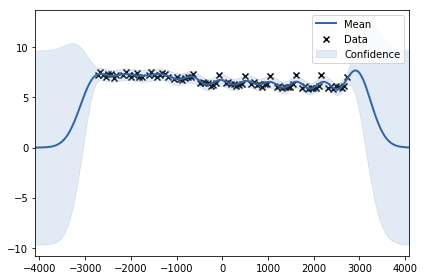

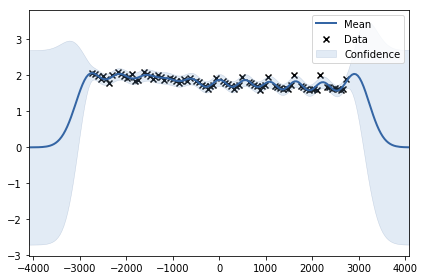

In [6]:
for i in range(1):
    model1.plot(visible_dims=[i])
    model2.plot(visible_dims=[i])


In [12]:
print model1.kern.lengthscale

  index  |  GP_regression.rbf.lengthscale  |  constraints  |  priors
  [0]    |                   345.74434984  |      +ve      |        


In [7]:
Y1.mean()

6.66877467625